In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"


mouse_data = pd.read_csv(mouse_drug_data_to_load)
clinical_data = pd.read_csv(clinical_trial_data_to_load)


mouse_data_complete = pd.merge(mouse_data, clinical_data, how="left", on=["Mouse ID", "Mouse ID"])


mouse_data_complete.head()




,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


mean = mouse_data_complete.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].mean()
df_mean = pd.DataFrame(mean)

df_mean.head()





Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

# Convert to DataFrame

# Preview DataFrame

drug_group = mouse_data_complete.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].sem()
df_drug =pd.DataFrame(drug_group)
df_drug.head()




Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [4]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked

df_pivot = pd.pivot_table(df_drug, values = 'Tumor Volume (mm3)', index=['Timepoint'], columns = 'Drug').reset_index()



In [5]:
df_pivot.head()

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
2,10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
3,15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
4,20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


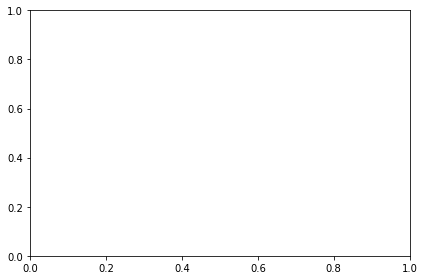

In [6]:
# Generate the Plot (with Error Bars)
Tumor = np.array([45 , 47.31 , 47.90 , 48.73 , 51.11])

Tumor_mean = np.mean(Tumor)
Tumor_sem = np.std(Tumor)

materials = ['Drug', 'Timepoint', 'Tumor']
x_pos = np.arange(len(materials))
CTEs = [Tumor_mean]
error = [Tumor_sem]


fig, ax = plt.subplots()



# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_with_error_bars.png')
plt.show()












In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


mean_met = mouse_data_complete.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].mean()
df_mean =pd.DataFrame(mean_met)
df_mean.head()



Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

# Convert to DataFrame

# Preview DataFrame


group_mouse = mouse_data_complete.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].sem()
df_group =pd.DataFrame(group_mouse)
df_group.head()








Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [9]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


df_pivot_met = pd.pivot_table(df_group, values = 'Metastatic Sites', index=['Timepoint'], columns = 'Drug').reset_index()
df_pivot_met.head()


Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
2,10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
3,15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
4,20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


Text(0, 0.5, 'Fake Banana Weights (in Hundres of Kilograms)')

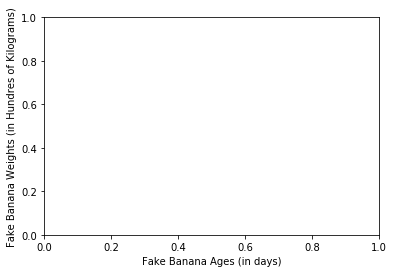

In [10]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Show the Figure
fig, ax = plt.subplots()
ax.set_xlabel("Fake Banana Ages (in days)")
ax.set_ylabel("Fake Banana Weights (in Hundres of Kilograms)")




In [11]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame

Mouse_group = mouse_data_complete.groupby(['Drug', 'Timepoint'])['Mouse ID'].count()
df_mouse = pd.DataFrame(Mouse_group)
df_mouse.head()


Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [12]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


df_pivot_mouse = pd.pivot_table(df_mouse, values = 'Mouse ID', index=['Timepoint'], columns = 'Drug').reset_index()
df_pivot_mouse.head()


Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,25,25,25,25,25,25,26,25,26,25
1,5,25,21,25,23,23,24,25,25,25,24
2,10,25,20,21,22,21,24,23,24,23,22
3,15,24,19,21,19,21,20,17,24,23,21
4,20,23,18,20,19,20,19,17,23,21,17


In [13]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

In [14]:
## Calculate the percent changes for each drug


change_percent = mean.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))
change_percent.head()


Drug       Timepoint
Capomulin  0            11.115205
           5            10.933925
           10           10.642016
           15           10.390078
           20           10.057118
Name: Tumor Volume (mm3), dtype: float64

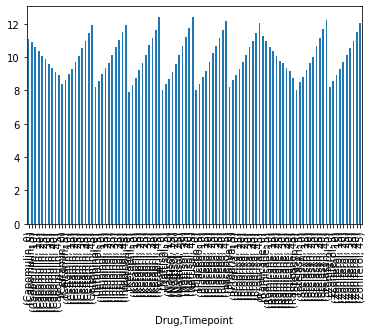

In [16]:
change_percent.plot.bar()